In [13]:
#%pip install geopandas
#%pip install folium
#%pip install shapely

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from copy_repo_funciones import *
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### SHAPELY 

In [14]:
from shapely.geometry import Point, Polygon

In [29]:
geo=gpd.read_file('../FINAL/RAW/GEOREF/georef-mexico-colonia/georef-mexico-colonia-millesime.shp')

In [30]:
geo.head()

,year,sta_code,sta_name,mun_code,mun_name,col_code,col_name,col_area_co,col_type,geometry
0,2022,['09'],['Ciudad de MÃ©xico'],['09002'],['Azcapotzalco'],['02-009'],['Coltongo'],MEX,colonia,"POLYGON ((-99.15595 19.48651, -99.15294 19.485..."
1,2022,['09'],['Ciudad de MÃ©xico'],['09003'],['CoyoacÃ¡n'],['03-006'],['Ampliacion Candelaria'],MEX,colonia,"POLYGON ((-99.15265 19.32581, -99.15336 19.326..."
2,2022,['09'],['Ciudad de MÃ©xico'],['09003'],['CoyoacÃ¡n'],['03-026'],['Croc Culhuacan Secc 6 (U Hab)'],MEX,colonia,"POLYGON ((-99.12251 19.32904, -99.12198 19.329..."
3,2022,['09'],['Ciudad de MÃ©xico'],['09003'],['CoyoacÃ¡n'],['03-072'],['Los Cipreses'],MEX,colonia,"POLYGON ((-99.12466 19.31520, -99.12491 19.315..."
4,2022,['09'],['Ciudad de MÃ©xico'],['09004'],['Cuajimalpa de Morelos'],['04-033'],['Lomas Del Chamizal'],MEX,colonia,"POLYGON ((-99.26654 19.38314, -99.26658 19.383..."


In [31]:
capt_22=pd.read_csv('../FINAL/RAW/SCALL/scall_2022.csv')

In [37]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point


# Iterate over capt_total
for index, row in capt_22.iterrows():
    lat = row['latitud']
    lon = row['longitud']
    
    # Create a Point object from the latitude and longitude coordinates
    point = Point(lon, lat)
    
    # Initialize the 'Colonia name' for the current row
    colonia_name = None
    
    # Iterate over the polygons to check if the point is inside any polygon
    for _, polygon in geo.iterrows():
        # Check if the point is inside the polygon
        if polygon['geometry'].contains(point):
            # Assign the 'Colonia name' for the current row
            colonia_name = polygon['col_name']
            break  # Exit the loop if a match is found
    
    # Assign the 'Colonia name' to the current row in capt_total
    capt_22.at[index, 'Colonia name'] = colonia_name


In [38]:
capt_22['Colonia name'].value_counts()

Colonia name
['San Antonio Tecomitl (Pblo)']                          1736
['Villa Milpa Alta (Pblo)']                              1736
['Santa Ana Tlacotenco (Pblo)']                          1048
['San Pablo Oztotepec (Pblo)']                            872
['San Salvador Cuauhtenco (Pblo)']                        813
                                                         ... 
['El Eden']                                                 1
['Degollado Chico']                                         1
['Ejto Constitucionalista', 'Supermanzana I (U Hab)']       1
['Castillo Chico']                                          1
['Fuego Nuevo']                                             1
Name: count, Length: 262, dtype: int64

In [55]:
capt_22.to_csv('../FINAL/RAW/SCALL/scall_2022_col.csv')

In [39]:
nancolsper(capt_22)

alcaldia         6.06
colonia_datos    6.06
Colonia name     0.70
dtype: float64

In [52]:
col_unique_counts(capt_22,'Colonia name')

,Colonia name,Count
0,['San Antonio Tecomitl (Pblo)'],1736
1,['Villa Milpa Alta (Pblo)'],1736
2,['Santa Ana Tlacotenco (Pblo)'],1048
3,['San Pablo Oztotepec (Pblo)'],872
4,['San Salvador Cuauhtenco (Pblo)'],813
5,['San Pedro Atocpan (Pblo)'],594
6,['Santo Tomas Ajusco (Pblo)'],515
7,['Selene 1a Secc'],479
8,['San Francisco Tecoxpa (Pblo)'],467
9,['Selene 2da Secc'],442


In [50]:
capt_22.loc[capt_22['Colonia name']=="['San Salvador Cuauhtenco (Pblo)']"]

,_id,expediente,pueblo,scall_col,territorial,fecha_instalacion,capacidad,alcaldia,colonia_datos,latitud,longitud,geometry,Colonia name
30,30,36-FLESAN-MIA-22,PUEBLO SAN SALVADOR CUAUHTENCO,SAN SALVADOR CUAUHTENCO- ZE,NO APLICA,2022-11-28T00:00:00,2500,MILPA ALTA,SAN SALVADOR CUAUHTENCO (PBLO),19.196844,-99.090491,POINT (-99.09049 19.19684),['San Salvador Cuauhtenco (Pblo)']
127,121,148-PAPEAD-MIA-22,PUEBLO SAN SALVADOR CUAUHTENCO,NO APLICA,NO APLICA,2022-05-23T00:00:00,2500,MILPA ALTA,SAN SALVADOR CUAUHTENCO (PBLO),19.190943,-99.093473,POINT (-99.09347 19.19094),['San Salvador Cuauhtenco (Pblo)']
129,123,150-PAVAYE-MIA-22,PUEBLO SAN SALVADOR CUAUHTENCO,SAN SALVADOR CUAUHTENCO- ZE,NO APLICA,2022-11-28T00:00:00,2500,MILPA ALTA,SAN SALVADOR CUAUHTENCO (PBLO),19.193940,-99.092322,POINT (-99.09232 19.19394),['San Salvador Cuauhtenco (Pblo)']
197,188,233-PRCOED-MIA-22,PUEBLO SAN SALVADOR CUAUHTENCO,NO APLICA,NO APLICA,2022-05-16T00:00:00,2500,MILPA ALTA,SAN SALVADOR CUAUHTENCO (PBLO),19.192169,-99.093774,POINT (-99.09377 19.19217),['San Salvador Cuauhtenco (Pblo)']
201,192,238-CAPRVA-MIA-22,PUEBLO SAN SALVADOR CUAUHTENCO,NO APLICA,NO APLICA,2022-05-16T00:00:00,2500,MILPA ALTA,SAN SALVADOR CUAUHTENCO (PBLO),19.192169,-99.093774,POINT (-99.09377 19.19217),['San Salvador Cuauhtenco (Pblo)']
205,195,242-ROOLGA-MIA-22,PUEBLO SAN SALVADOR CUAUHTENCO,NO APLICA,NO APLICA,2022-05-31T00:00:00,2500,MILPA ALTA,SAN SALVADOR CUAUHTENCO (PBLO),19.192544,-99.089211,POINT (-99.08921 19.19254),['San Salvador Cuauhtenco (Pblo)']
208,198,245-FEORIS-MIA-22,PUEBLO SAN SALVADOR CUAUHTENCO,NO APLICA,NO APLICA,2022-06-13T00:00:00,2500,MILPA ALTA,SAN SALVADOR CUAUHTENCO (PBLO),19.193696,-99.088875,POINT (-99.08888 19.19370),['San Salvador Cuauhtenco (Pblo)']
215,205,255-CHHEMA-MIA-22,PUEBLO SAN SALVADOR CUAUHTENCO,NO APLICA,NO APLICA,2022-06-06T00:00:00,2500,MILPA ALTA,SAN SALVADOR CUAUHTENCO (PBLO),19.189843,-99.094362,POINT (-99.09436 19.18984),['San Salvador Cuauhtenco (Pblo)']
220,210,260-CHVEAR-MIA-22,PUEBLO SAN SALVADOR CUAUHTENCO,NO APLICA,NO APLICA,2022-06-06T00:00:00,2500,MILPA ALTA,SAN SALVADOR CUAUHTENCO (PBLO),19.189962,-99.094124,POINT (-99.09412 19.18996),['San Salvador Cuauhtenco (Pblo)']
237,226,283-CRMOLU-MIA-22,PUEBLO SAN SALVADOR CUAUHTENCO,NO APLICA,NO APLICA,2022-05-23T00:00:00,1100,MILPA ALTA,SAN SALVADOR CUAUHTENCO (PBLO),19.190641,-99.091526,POINT (-99.09153 19.19064),['San Salvador Cuauhtenco (Pblo)']


In [48]:
col_unique_counts(capt_22, 'Colonia name')

,Colonia name,Count
0,['San Antonio Tecomitl (Pblo)'],1736
1,['Villa Milpa Alta (Pblo)'],1736
2,['Santa Ana Tlacotenco (Pblo)'],1048
3,['San Pablo Oztotepec (Pblo)'],872
4,['San Salvador Cuauhtenco (Pblo)'],813
5,['San Pedro Atocpan (Pblo)'],594
6,['Santo Tomas Ajusco (Pblo)'],515
7,['Selene 1a Secc'],479
8,['San Francisco Tecoxpa (Pblo)'],467
9,['Selene 2da Secc'],442


## Explorando archivo de contaminación

In [21]:
geo=gpd.read_file('../FINAL/RAW/contaminacin-de-agua-en-la-ciudad-de-mxico-.json')

In [33]:
geo.head()

,ID,GRIDCODE,Valores,geometry
0,1,2,0.168035 - 0.494131,"POLYGON ((-99.22138 19.29803, -99.22709 19.298..."
1,2,2,0.168035 - 0.494131,"POLYGON ((-99.16045 19.27822, -99.16711 19.278..."
2,3,1,0.001938 - 0.168035,"POLYGON ((-99.34506 19.27073, -99.34519 19.332..."
3,4,0,NaN,"POLYGON ((-99.05965 19.51596, -99.00723 19.515..."
4,5,0,NaN,"POLYGON ((-99.21275 19.24563, -99.34501 19.245..."


In [30]:
contAlta= geo[geo['GRIDCODE']==2]
contMedia=geo[geo['GRIDCODE']==1]

In [39]:
style_function1 = lambda x: {'fillColor': 'red', 'color': 'red'}
style_function2 = lambda x: {'fillColor': 'orange', 'color': 'orange'}

In [25]:
mexico_city_coords = [19.4326, -99.1332]  # Coordinates of Mexico City
m = folium.Map(location=mexico_city_coords, zoom_start=10)


In [40]:
for _, row in contAlta.iterrows():
    folium.GeoJson(row.geometry, style_function=style_function1).add_to(m)

for _, row in contMedia.iterrows():
    folium.GeoJson(row.geometry, style_function=style_function2).add_to(m)


In [41]:
m

## Archivo Kernell (contaminación)

Determinando diferencias con el de arriba, OK ES EL MISMO!

In [49]:
kernell=gpd.read_file('../FINAL/RAW/contaminacion/kernel_agua.shp')

In [50]:
kernell.head()

,ID,GRIDCODE,Valores,geometry
0,1,2,0.168035 - 0.494131,"POLYGON ((476741.123 2133819.673, 476141.123 2..."
1,2,2,0.168035 - 0.494131,"POLYGON ((483141.123 2131619.673, 482441.123 2..."
2,3,1,0.001938 - 0.168035,"POLYGON ((463741.123 2130819.673, 463741.123 2..."
3,4,0,NaN,"POLYGON ((493741.123 2157919.673, 499241.123 2..."
4,5,0,NaN,"POLYGON ((477641.123 2128019.673, 463741.123 2..."


## Tandeo


In [3]:
tandeo=gpd.read_file('../FINAL/RAW/TANDEO/tandeo2019/tandeo2019.shp')

In [7]:
tandeo.tail()

,ID,ENTIDAD,MUNICIPIO,NOMBRE,DELEGACIO,tnd_2019,geometry
2394,604,9,16,DEPORTIVA PENSIL,MIGUEL HIDALGO,no,"POLYGON ((-99.19972 19.45254, -99.19922 19.452..."
2395,1633,9,12,SANTISIMA TRINIDAD,TLALPAN,si,"POLYGON ((-99.18858 19.27338, -99.18708 19.272..."
2396,605,9,16,5 DE MAYO,MIGUEL HIDALGO,no,"POLYGON ((-99.19974 19.45038, -99.19876 19.450..."
2397,1634,9,12,TEPETONGO,TLALPAN,si,"POLYGON ((-99.18948 19.27203, -99.18944 19.272..."
2398,NaN,NaN,NaN,NaN,TLÃHUAC,no,None


<Axes: >

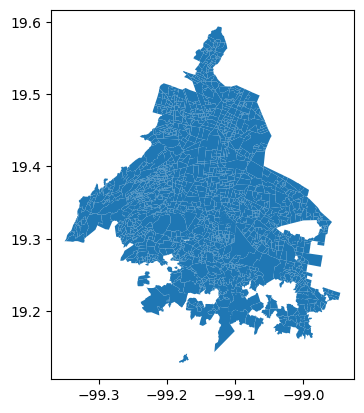

In [15]:
tandeo.plot()

In [16]:
subset = tandeo[tandeo['tnd_2019'] == 'si']

<Axes: >

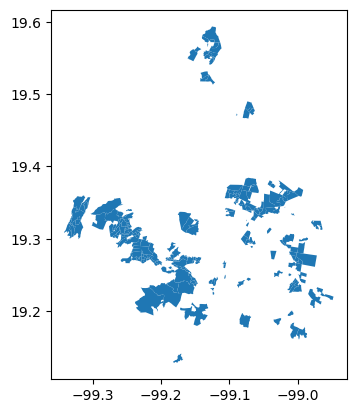

In [17]:
subset.plot()

## Riesgos

In [13]:
riesgos=gpd.read_file('../FINAL/RAW/RIESGOS/sintesis_riesgos.shp')

In [14]:
riesgos.head()

,OBJECTID,R_G1,R_H1,R_H2,R_H3,R_G2,SUMATORIA,geometry
0,1,NaN,NaN,NaN,NaN,Inestabilidad de laderas,1,"MULTIPOLYGON (((481202.577 2115603.035, 481202..."
1,2,NaN,NaN,NaN,Sequia,NaN,1,"MULTIPOLYGON (((493721.142 2106741.000, 493721..."
2,3,NaN,NaN,NaN,Sequia,Inestabilidad de laderas,2,"MULTIPOLYGON (((486401.142 2164805.490, 486401..."
3,4,NaN,NaN,NaN,Sequia,Inestabilidad de laderas,3,"MULTIPOLYGON (((500901.142 2119801.000, 500896..."
4,5,NaN,NaN,Olas de calor,NaN,NaN,1,"MULTIPOLYGON (((500841.142 2119421.000, 500841..."


In [18]:
sequia= riesgos[riesgos['R_H3']=='Sequia']

<Axes: >

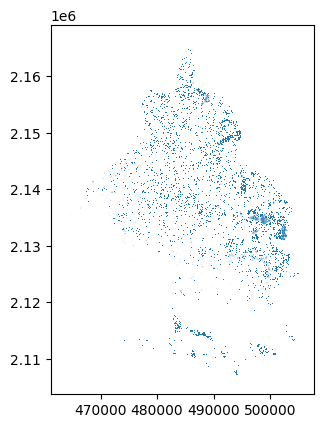

In [19]:
sequia.plot()

## Consumo promedio habitacional DOMESTICO

-  **cve_ent** -> Clave entidad federativa
-  **cve_col** -> Clave colonia
-  **Frequency** -> ??
-  **SUM_cons_t** -> Suma del consumo total de agua por colonia (m3) por bimestre
-  **MEAN_cons_** -> Promedio de consumo total de colonia (m3) por bimestre
-  **VIV2010**  -> "Vivienda censo 2010
-  **PROMVIVCON** -> Promedio de consumo total de agua de la colonia por número de
viviendas
- **C_PROMVIVC** -> Campo reclasificado en cuantiles en 5 rangos a partir de
"PROMVIVCON"; donde el valor "5" corresponde a un consumo de agua
muy alto, mientras que el número "1" a un consumo bajo

In [3]:
consumo=gpd.read_file('../FINAL/RAW/CONSUMO/consumo_hab_prom_agua_col/Consumo_hab_prom_agua_col.shp')

In [4]:
consumo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cve_ent     1814 non-null   object  
 1   alcaldia    1814 non-null   object  
 2   cve_col     1814 non-null   object  
 3   colonia     1814 non-null   object  
 4   OBJECTID    1815 non-null   int64   
 5   FREQUENCY   1815 non-null   int64   
 6   SUM_cons_t  1815 non-null   float64 
 7   MEAN_cons_  1815 non-null   float64 
 8   VIV2010     1815 non-null   int64   
 9   PROMVIVCON  1815 non-null   float64 
 10  C_PROMVIVC  1815 non-null   int64   
 11  geometry    1815 non-null   geometry
dtypes: float64(3), geometry(1), int64(4), object(4)
memory usage: 170.3+ KB


In [5]:
def plot_value_counts(df, column):
    # Count the unique values in the specified column
    value_counts = df[column].value_counts()

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Count of Unique Values in {column} Column')
    plt.xticks(rotation=45)
    plt.show()

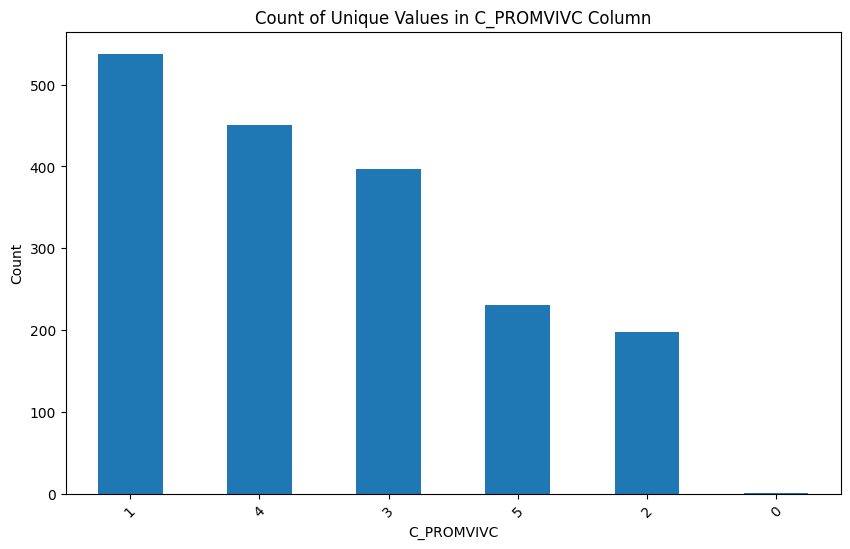

In [7]:
plot_value_counts(consumo, 'C_PROMVIVC')

In [10]:
col_unique_counts(consumo, 'colonia')

,colonia,Count
0,LA JOYA,4
1,MIGUEL HIDALGO,4
2,LA ASUNCION (BARR),3
3,FRANCISCO VILLA,3
4,EL RODEO,3
...,...,...
1738,MAXIMINO AVILA CAMACHO,1
1739,MARTIRES DE RIO BLANCO (AMPL),1
1740,MARTIRES DE RIO BLANCO,1
1741,MARTIN CARRERA II,1


## OTHERS

In [8]:
import pandas as pd

# Create a sample DataFrame
data = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]})

# Get the column at index 0
column_0 = data.iloc[:, 0]

# Print the values of the column
print(column_0)


0    1
1    2
2    3
Name: A, dtype: int64


In [12]:
data.iloc[:, 2]

0    7
1    8
2    9
Name: C, dtype: int64